# Phase 1, stage 2 - visualising the prediction results and running LIME

In [13]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

plt.rcParams['figure.figsize'] = [10, 10]

date = "06May2022"
model_name = "./model/all9variants_size400_" + date
output_csv_name = "./output/all9classes_predictions_" + date + ".csv"
qc_csv_name = "./output/all_info_size400_stage0filtered_" + date + ".csv"
output_json_name = "./output/all9classes_index_" + date + ".json"

In [4]:
all_df = pd.read_csv(output_csv_name)
all_df = all_df.loc[all_df.qc_class.isin(["airliner", "warplane", "airship"]), ]

with open(output_json_name, "r") as f:
    class_index = json.load(f)

all_df.columns

Index(['index', 'long_model', 'airline', 'photo_date', 'uploaded_date',
       'location', 'uploader', 'photo_link', 'download_path', 'model',
       'variant', 'qc_class', 'purpose', 'classes', 'pred_A320', 'pred_A330',
       'pred_A340', 'pred_A350', 'pred_A380', 'pred_B737', 'pred_B747',
       'pred_B777', 'pred_B787', 'prediction_class'],
      dtype='object')

In [5]:
all_df["prediction_class"]

0        A320
1        A320
2        A320
3        A320
4        B777
         ... 
18489    A320
18490    A340
18491    B737
18492    A380
18493    B787
Name: prediction_class, Length: 18494, dtype: object

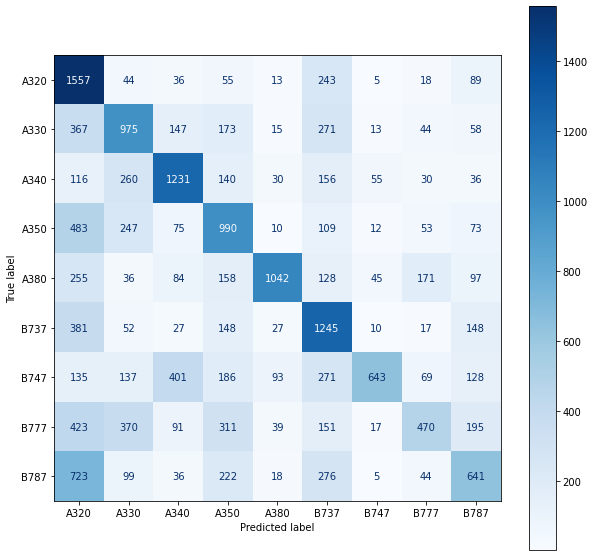

In [7]:
cm = confusion_matrix(all_df["model"], all_df["prediction_class"])
cmd = ConfusionMatrixDisplay(cm, display_labels=class_index.values())
cmd.plot(cmap="Blues")

# Visualise incorrect predictions for A380 

In [8]:
rstats = 158
a380_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=rstats)
a380_incorrect = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class!="A380"),:].sample(n=6, random_state=rstats)

In [9]:
a380_correct

,index,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,pred_A320,pred_A330,pred_A340,pred_A350,pred_A380,pred_B737,pred_B747,pred_B777,pred_B787,prediction_class
8999,9114,Airbus A380-841,British Airways,Photo date: 2016-12-04,Uploaded: 2021-01-18,"Location: London Heathrow Int'l - EGLL, United...",By: X Pan,cdn.jetphotos.com/400/6/31805_1610478997.jpg,./img/size_400/A380/cdn.jetphotos.com-400-6-31...,A380,...,-1.695946,-27.171286,-12.728250,-16.413908,13.487077,-3.583247,-11.677300,-13.267903,-7.603447,A380
8890,9003,Airbus A380-861,Emirates,Photo date: 2017-07-08,Uploaded: 2021-02-02,"Location: Beijing Capital - ZBAA, China",By: Hongyu Wang,cdn.jetphotos.com/400/5/75053_1611777813.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-75...,A380,...,-9.880520,-23.350164,-19.511778,-7.281931,17.321928,2.182402,-11.285945,-15.532272,-6.269513,A380
9054,9174,Airbus A380-861,Emirates,Photo date: 2019-09-05,Uploaded: 2021-01-08,"Location: Barcelona El Prat - LEBL, Spain",By: Ismael Lopez,cdn.jetphotos.com/400/5/74033_1609678354.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-74...,A380,...,-7.503247,-8.199162,-10.166191,-14.298243,12.987022,-8.346833,-10.383896,-8.678481,-10.175880,A380


In [10]:
a380_incorrect

,index,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,pred_A320,pred_A330,pred_A340,pred_A350,pred_A380,pred_B737,pred_B747,pred_B777,pred_B787,prediction_class
9404,9531,Airbus A380-841,China Southern Airlines,Photo date: 2020-07-29,Uploaded: 2020-11-29,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: Unbeliverpool,cdn.jetphotos.com/400/6/51558_1606278635.jpg,./img/size_400/A380/cdn.jetphotos.com-400-6-51...,A380,...,5.007341,-12.760545,-3.352836,-7.627155,0.470230,-12.785745,-6.069936,-10.366852,-13.064995,A320
9741,9878,Airbus A380-841,British Airways,Photo date: 2015-01-19,Uploaded: 2020-10-11,"Location: London Heathrow Int'l - EGLL, United...",By: wanghaotian,cdn.jetphotos.com/400/5/78946_1601887783.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-78...,A380,...,6.251061,-13.589723,-10.540077,-18.302080,3.813135,-8.670939,-5.221752,-20.839474,-13.659410,A320
8969,9084,Airbus A380-861,Air France,Photo date: 2019-06-01,Uploaded: 2021-01-20,Location: Paris Roissy - Charles de Gaulle - L...,By: Mustafa Sandikci,cdn.jetphotos.com/400/5/22120_1610795764.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-22...,A380,...,3.535247,-12.918460,-12.214408,-5.916810,-8.894322,-20.316195,-26.791206,10.727306,-4.423773,B777
9409,9536,Airbus A380-861,Korean Air,Photo date: 2019-12-14,Uploaded: 2020-11-28,"Location: Seoul Incheon Int'l - RKSI, South Korea",By: Park geon u,cdn.jetphotos.com/400/5/11143_1606221106.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-11...,A380,...,-10.095753,-9.623136,-2.216303,-12.299998,-4.283882,0.855939,2.301387,-7.909488,-4.302100,B747
9980,10131,Airbus A380-841,China Southern Airlines,Photo date: 2020-07-31,Uploaded: 2020-08-29,"Location: Amsterdam Schiphol Airport - EHAM, N...",By: Julian Mittnacht,cdn.jetphotos.com/400/5/32802_1597688884.jpg,./img/size_400/A380/cdn.jetphotos.com-400-5-32...,A380,...,2.021050,-2.801301,-5.754118,-14.280649,-6.565841,-12.136910,-4.125042,-11.766851,-6.385198,A320
9650,9780,Airbus A380-841,Singapore Airlines,Photo date: 2011-05-08,Uploaded: 2020-10-25,Location: Singapore Changi Int'l Airport - WSS...,By: Tsuyoshi Tsuda,cdn.jetphotos.com/400/6/11646_1603019403.jpg,./img/size_400/A380/cdn.jetphotos.com-400-6-11...,A380,...,-7.671917,-11.540010,-8.614638,2.204951,-11.069592,-3.033803,-13.407651,-20.673570,-6.208403,A350


In [11]:
img_df = pd.concat([a380_correct, a380_incorrect], axis=0)
img_df["download_path"].values

array(['./img/size_400/A380/cdn.jetphotos.com-400-6-31805_1610478997.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-75053_1611777813.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-74033_1609678354.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-6-51558_1606278635.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-78946_1601887783.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-22120_1610795764.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-11143_1606221106.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-5-32802_1597688884.jpg',
       './img/size_400/A380/cdn.jetphotos.com-400-6-11646_1603019403.jpg'],
      dtype=object)

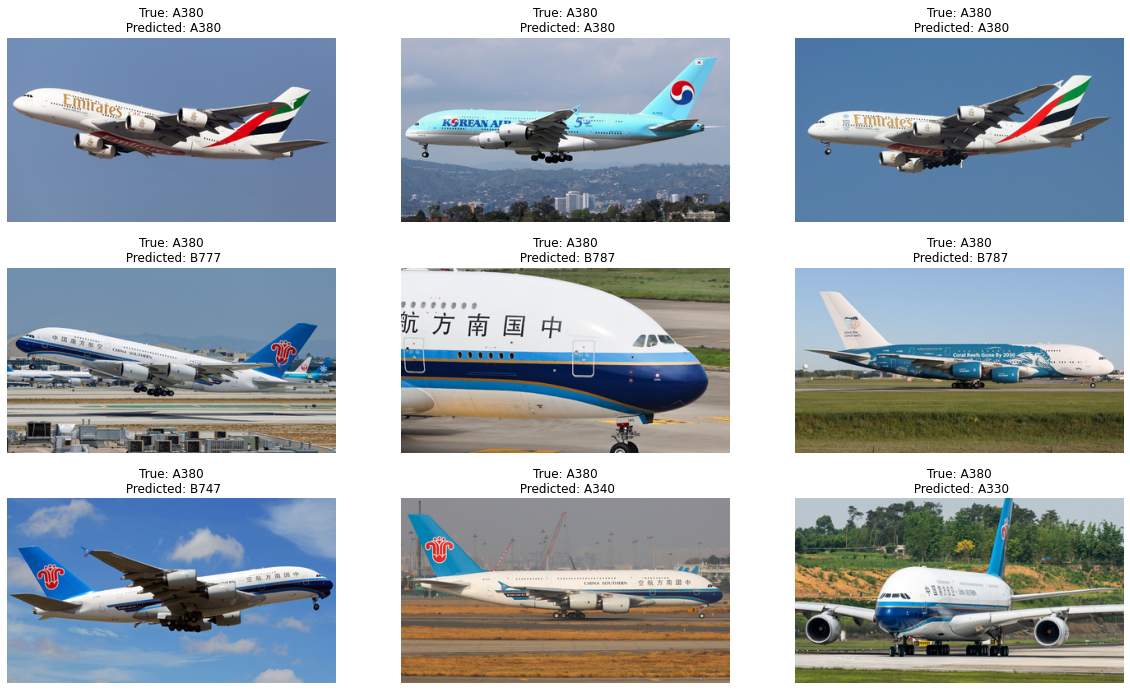

In [20]:
plt.figure(figsize=(20, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

In [24]:
rstats = 22
a380_pred_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=rstats)
a380_pred_incorrect = all_df.loc[(all_df.model!="A380") & (all_df.prediction_class=="A380"),:].sample(n=6, random_state=rstats)

In [25]:
img_df = pd.concat([a380_pred_correct, a380_pred_incorrect], axis=0)
img_df["download_path"].values

array(['./img/A380/cdn.jetphotos.com-400-6-53466_1595374205.jpg',
       './img/A380/cdn.jetphotos.com-400-6-91892_1621334067.jpg',
       './img/A380/cdn.jetphotos.com-400-6-76510_1615686419.jpg',
       './img/B787/cdn.jetphotos.com-400-5-99051_1619865509.jpg',
       './img/B777/cdn.jetphotos.com-400-5-41661_1620490918.jpg',
       './img/B747/cdn.jetphotos.com-400-5-57248_1620773099.jpg',
       './img/B747/cdn.jetphotos.com-400-6-10152_1621411670.jpg',
       './img/B787/cdn.jetphotos.com-400-5-10993_1621584399.jpg',
       './img/B747/cdn.jetphotos.com-400-6-25296_1620137351.jpg'],
      dtype=object)

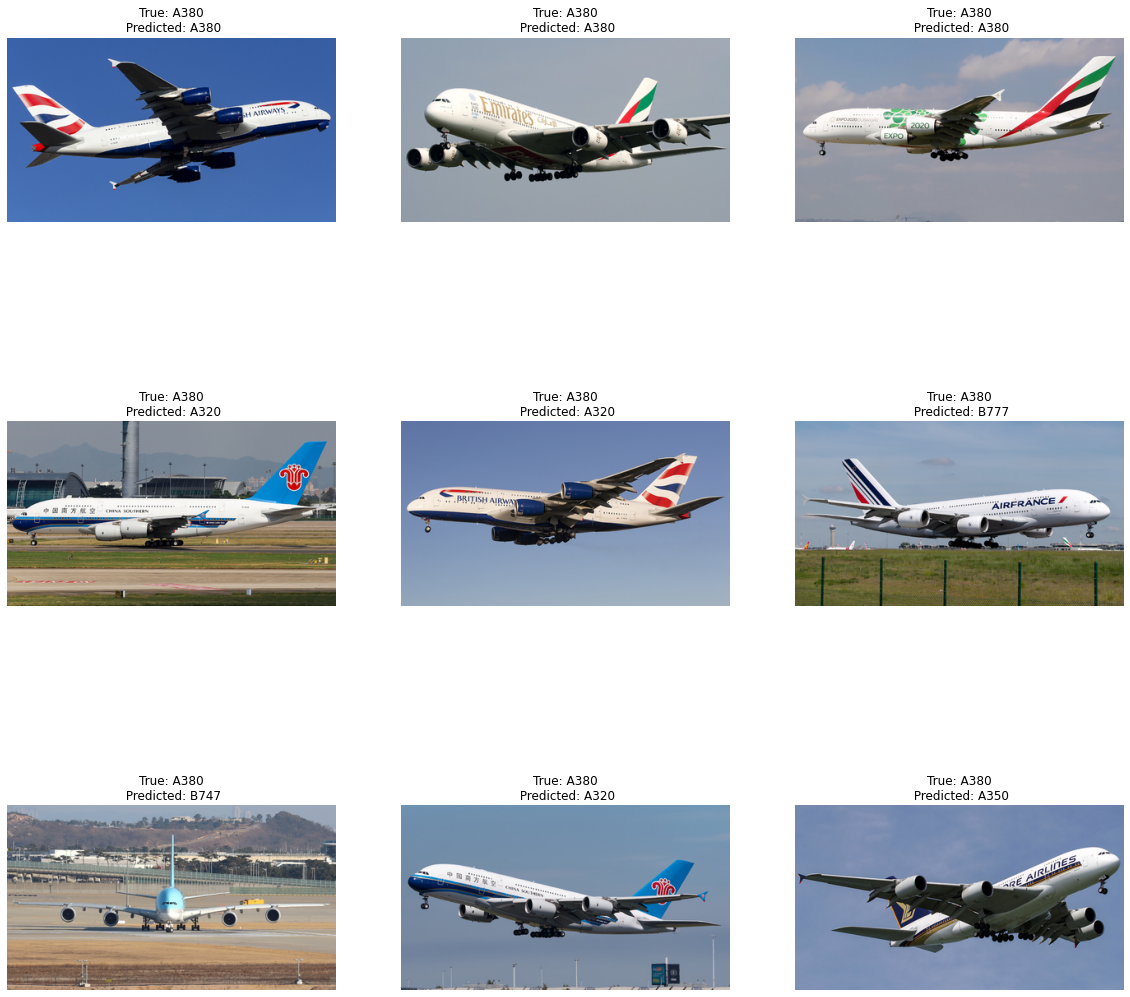

In [12]:
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

# Visualising QC classes

airliner         2036
warplane           25
wing                8
missile             4
bullet_train        2
airship             2
barrel              1
space_shuttle       1
pop_bottle          1
Name: qc_class, dtype: int64


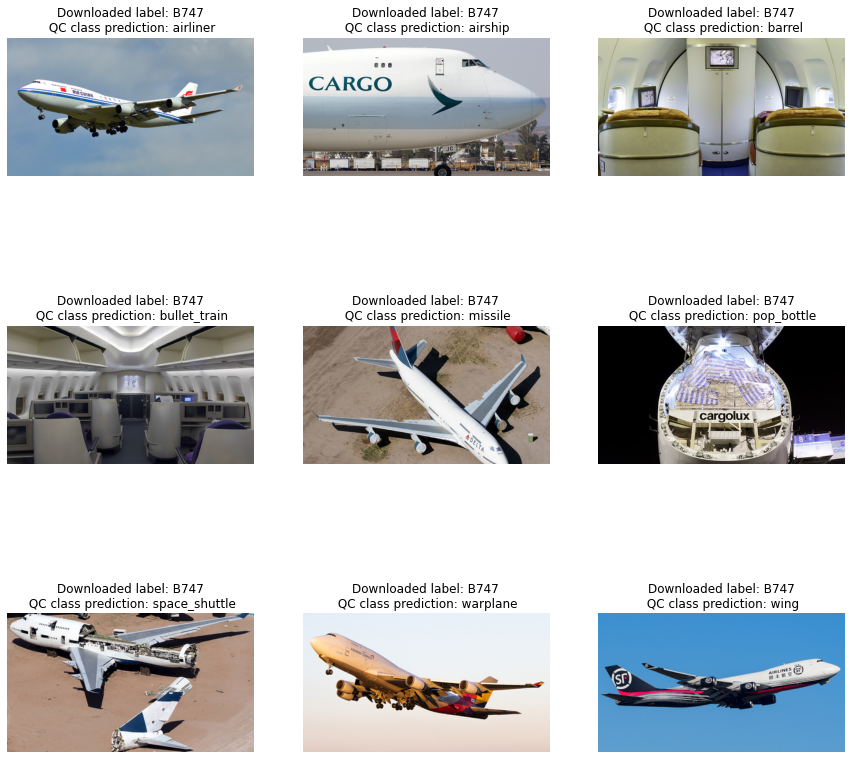

In [14]:
tmp = pd.read_csv(qc_csv_name)
tmp = tmp.loc[tmp.model.isin(["B747"]), ]
print(tmp.qc_class.value_counts())
tmp = tmp.groupby("qc_class").sample(n = 1, random_state = 1)
plt.figure(figsize=(15, 15))
for i in range(tmp.shape[0]):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(tmp["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "Downloaded label: " + tmp["model"].values[i] + "\n QC class prediction: " + tmp["qc_class"].values[i]
    ax.set_title(title)

# Using LIME to explain the classifications

In [15]:
import os
import keras
# from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
# from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [16]:
model = keras.models.load_model(model_name)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-09 11:01:16.571013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-09 11:01:16.571119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(225, 400))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = prep_fn(x)
        out.append(x)
    return np.vstack(out)

In [18]:
from lime import lime_image

In [19]:
explainer = lime_image.LimeImageExplainer()

def explain_and_plot(image):
    explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=100, hide_rest=True)
    return plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [20]:
from skimage.segmentation import mark_boundaries

(12, 24)


  0%|          | 0/1000 [00:00<?, ?it/s]2022-05-09 11:01:36.490141: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-09 11:01:36.682993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
100%|██████████| 1000/1000 [00:11<00:00, 90.07it/s]


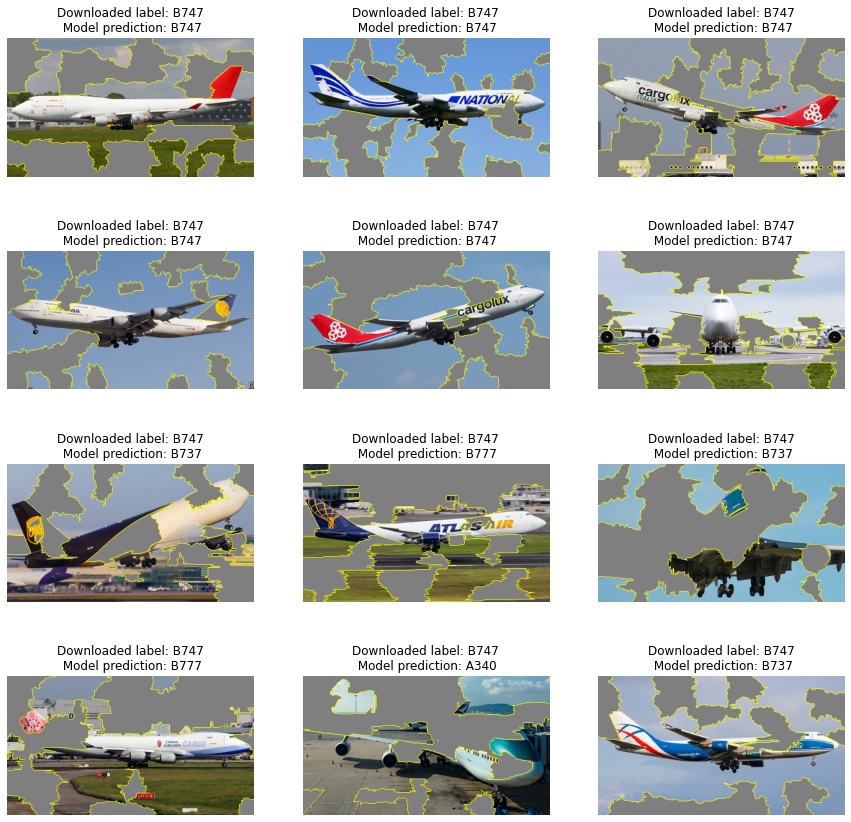

In [21]:
b747_correct = all_df.loc[(all_df.model=="B747") & (all_df.prediction_class=="B747"),:].sample(n=6, random_state=2)
b747_incorrect = all_df.loc[(all_df.model=="B747") & (all_df.prediction_class!="B747"),:].sample(n=6, random_state=5)
img_df = pd.concat([b747_correct, b747_incorrect], axis=0)
images = transform_img_fn(img_df.loc[:, "download_path"].values)

print(img_df.shape)
plt.figure(figsize=(15, 15))

for i in range(img_df.shape[0]):
    ax = plt.subplot(4, 3, i + 1)
    # img = mpimg.imread(img_df["download_path"].values[i])
    # plt.imshow(img)
    explain_and_plot(images[i])
    plt.axis("off")
    title = "Downloaded label: " + img_df["model"].values[i] + "\n Model prediction: " + img_df["prediction_class"].values[i]
    ax.set_title(title)